# Final Project

### Install necessary packages for the project

In [1]:
!conda install -c anaconda xlrd --yes
!conda install -c conda-forge folium=0.5.0 --yes

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be SUPERSEDED by a higher-priority channel:

    xlrd: 1.1.0-py35h45a0a2a_1 --> 1.1.0-py35_1 anaconda

xlrd-1.1.0-py3 100% |################################| Time: 0:00:00  40.42 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  57.21 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  36.09 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  41.23 MB/s
folium-0.5.0-p 100% |######################

In [2]:
import requests
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

There's a hidden code cell here that create the Foursquare credentials

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
# this sets the category id for Asian restaurants as stated in Foursquare's API
CATEGORY = '4bf58dd8d48988d142941735'

# Unfortunately even when provided a explicit category Foursquare will return unrelated results. This list will be used later to clean the data of unrelated content.
ALL_CATEGORIES = ["Asian Restaurant", "Burmese Restaurant", "Cambodian Restaurant", "Chinese Restaurant", "Anhui Restaurant", "Beijing Restaurant", "Cantonese Restaurant", "Cha Chaan Teng", "Chinese Aristocrat Restaurant", "Chinese Breakfast Place", "Dim Sum Restaurant", "Dongbei Restaurant", "Fujian Restaurant", "Guizhou Restaurant", "Hainan Restaurant", "Hakka Restaurant", "Henan Restaurant", "Hong Kong Restaurant", "Huaiyang Restaurant", "Hubei Restaurant", "Hunan Restaurant", "Imperial Restaurant", "Jiangsu Restaurant", "Jiangxi Restaurant", "Macanese Restaurant", "Manchu Restaurant", "Peking Duck Restaurant", "Shaanxi Restaurant", "Shandong Restaurant", "Shanghai Restaurant", "Shanxi Restaurant", "Szechuan Restaurant", "Taiwanese Restaurant", "Tianjin Restaurant", "Xinjiang Restaurant", "Yunnan Restaurant", "Zhejiang Restaurant", "Filipino Restaurant", "Himalayan Restaurant", "Hotpot Restaurant", "Indonesian Restaurant", "Acehnese Restaurant", "Balinese Restaurant", "Betawinese Restaurant", "Indonesian Meatball Place", "Javanese Restaurant", "Manadonese Restaurant", "Padangnese Restaurant", "Sundanese Restaurant", "Japanese Restaurant", "Donburi Restaurant", "Japanese Curry Restaurant", "Kaiseki Restaurant", "Kushikatsu Restaurant", "Monjayaki Restaurant", "Nabe Restaurant", "Okonomiyaki Restaurant", "Ramen Restaurant", "Shabu-Shabu Restaurant", "Soba Restaurant", "Sukiyaki Restaurant", "Sushi Restaurant", "Takoyaki Place", "Tempura Restaurant", "Tonkatsu Restaurant", "Udon Restaurant", "Unagi Restaurant", "Wagashi Place", "Yakitori Restaurant", "Yoshoku Restaurant", "Korean Restaurant", "Bossam/Jokbal Restaurant", "Bunsik Restaurant", "Gukbap Restaurant", "Janguh Restaurant", "Samgyetang Restaurant", "Malay Restaurant", "Mamak Restaurant", "Mongolian Restaurant", "Noodle House", "Satay Restaurant", "Thai Restaurant", "Som Tum Restaurant", "Tibetan Restaurant", "Vietnamese Restaurant"]

In [5]:
def get_category_type(row):
    categories_list = []
    for category in row['categories']:   
        categories_list.append(category['name'])
    if len(categories_list) == 0:
        return None
    else:
        return categories_list

In [6]:
#define lat and lng for Austin, TX
LIMIT = 100
RADIUS = 2000 # This is approx. 5 miles in meters

explore_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near=Austin,TX&radius={}&limit={}&query={}'.format(
CLIENT_ID,
CLIENT_SECRET,
VERSION,
RADIUS,
LIMIT,
CATEGORY)

In [7]:
explore_results = requests.get(explore_url).json()['response']['groups'][0]['items']

In [8]:
explore_venues = json_normalize(explore_results)
explore_venues.head()

,flags.outsideRadius,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,...,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,NaN,0,"[{'reasonName': 'globalInteractionReason', 'su...",e-0-4e5ecaad7d8b67dc8ff98739-0,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",4e5ecaad7d8b67dc8ff98739,501 N Interstate 35,US,Austin,United States,...,"[{'label': 'display', 'lng': -97.7341554779942...",30.264920,-97.734155,NaN,78702,TX,The North Door,0,[],99340065
1,NaN,0,"[{'reasonName': 'globalInteractionReason', 'su...",e-0-55bad8c5498e994ab72cd2cc-1,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",55bad8c5498e994ab72cd2cc,2406 Manor Rd,US,Austin,United States,...,"[{'label': 'display', 'lng': -97.7171103000197...",30.284870,-97.717110,NaN,78722,TX,Unit-D Pizzeria,0,[],NaN
2,NaN,0,"[{'reasonName': 'globalInteractionReason', 'su...",e-0-5931d21646e1b652792eac1f-2,"[{'id': '52f2ab2ebcbc57f1066b8b3f', 'name': 'L...",5931d21646e1b652792eac1f,507 W 10th St,US,Austin,United States,...,"[{'label': 'display', 'lng': -97.74691, 'lat':...",30.273060,-97.746910,NaN,78701,TX,Michaela D. Cuellar Attorney at Law,0,[],NaN
3,True,0,"[{'reasonName': 'globalInteractionReason', 'su...",e-0-4af60ccbf964a520970022e3-3,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",4af60ccbf964a520970022e3,5610 N Lamar Blvd Ste B,US,Austin,United States,...,"[{'label': 'display', 'lng': -97.7272348678905...",30.325199,-97.727235,NaN,78751,TX,D K Sushi and Seoul Asian Food Market,0,[],NaN
4,NaN,0,"[{'reasonName': 'globalInteractionReason', 'su...",e-0-4f15bdd0e4b067841512162a-4,"[{'id': '4bf58dd8d48988d151941735', 'name': 'T...",4f15bdd0e4b067841512162a,2020 E 7th St,US,Austin,United States,...,"[{'label': 'display', 'lng': -97.7192002814890...",30.261984,-97.719200,NaN,78702,TX,Takeria D.F. (East 7th),0,[],NaN


In [9]:
explore_venues = explore_venues.rename(index=str, columns={"venue.name":"name", "venue.categories":"categories", "venue.location.lat":"latitude", "venue.location.lng":"longitude", "venue.location.postalCode":"postalCode"})
filtered_columns = ['name', 'categories', 'latitude', 'longitude', 'postalCode']
explore_venues = explore_venues.loc[:, filtered_columns]
explore_venues['categories'] = explore_venues.apply(get_category_type, axis=1)
explore_venues.head()

,name,categories,latitude,longitude,postalCode
0,The North Door,[Lounge],30.264920,-97.734155,78702
1,Unit-D Pizzeria,[Pizza Place],30.284870,-97.717110,78722
2,Michaela D. Cuellar Attorney at Law,[Lawyer],30.273060,-97.746910,78701
3,D K Sushi and Seoul Asian Food Market,[Japanese Restaurant],30.325199,-97.727235,78751
4,Takeria D.F. (East 7th),[Taco Place],30.261984,-97.719200,78702


In [10]:
search_url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&near=Austin,TX&radius={}&limit={}&categoryId={}'.format(
CLIENT_ID,
CLIENT_SECRET,
VERSION,
RADIUS,
LIMIT,
CATEGORY)

In [11]:
search_results = requests.get(search_url).json()['response']['venues']

In [12]:
search_venues = json_normalize(search_results)
search_venues.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",NaN,NaN,NaN,NaN,NaN,NaN,False,5665aed8498e1563bc7a6503,117 W 4th St,...,"[117 W 4th St, Austin, TX 78701, United States]","[{'label': 'display', 'lng': -97.7450400601234...",30.267135,-97.745040,NaN,78701,TX,RA Sushi Bar Restaurant,v-1555293462,NaN
1,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",362004,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/ra-sushi-11...,False,5622e6f3498e22966e166d4d,117 W 4th St,...,"[117 W 4th St (Congress), Austin, TX 78701, Un...","[{'label': 'display', 'lng': -97.7444178801701...",30.266466,-97.744418,NaN,78701,TX,RA,v-1555293462,NaN
2,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,False,5be77a0b8194fc0039ff4161,"120 St,W 5th",...,"[120 St,W 5th, Austin, TX 78701, United States]","[{'label': 'display', 'lng': -97.74391, 'lat':...",30.267458,-97.743910,NaN,78701,TX,House of the Rising Tanuki - San,v-1555293462,NaN
3,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,5b564ea6ad910e002cdf1996,440 W 2nd St,...,"[440 W 2nd St, Austin, TX 78701, United States]","[{'label': 'display', 'lng': -97.7483598988592...",30.265555,-97.748360,NaN,78701,TX,She’s Not Here,v-1555293462,NaN
4,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",1043114,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/ni-kome-sus...,False,5a613ba39e3b6534d933e354,111 Congress Ave,...,"[111 Congress Ave (Cesar Chavez), Austin, TX 7...","[{'label': 'display', 'lng': -97.7441414351090...",30.263474,-97.744141,NaN,78701,TX,Ni-Kome Sushi And Ramen,v-1555293462,485683734


In [13]:
search_venues = search_venues.rename(index=str, columns={"location.lat":"latitude", "location.lng":"longitude", "location.postalCode":"postalCode"})
filtered_columns = ['name', 'categories', 'latitude', 'longitude', 'postalCode']
search_venues = search_venues.loc[:, filtered_columns]
search_venues['categories'] = search_venues.apply(get_category_type, axis=1)
search_venues.head()

,name,categories,latitude,longitude,postalCode
0,RA Sushi Bar Restaurant,[Japanese Restaurant],30.267135,-97.745040,78701
1,RA,[Sushi Restaurant],30.266466,-97.744418,78701
2,House of the Rising Tanuki - San,[Asian Restaurant],30.267458,-97.743910,78701
3,She’s Not Here,[Cocktail Bar],30.265555,-97.748360,78701
4,Ni-Kome Sushi And Ramen,[Japanese Restaurant],30.263474,-97.744141,78701


In [14]:
venues = explore_venues.append(search_venues)
venues = venues.sort_values(by=['postalCode'])
venues.head()

,name,categories,latitude,longitude,postalCode
6,Goldenview Ultrasound 3d/4d/HDlive San Antonio,[Doctor's Office],29.551980,-98.584739,78230
28,Maiko Sushi Lounge,[Sushi Restaurant],30.268841,-97.745724,78701
13,Chi'lantro BBQ,[Food Truck],30.270370,-97.740898,78701
36,P.F. Chang's,[Chinese Restaurant],30.263782,-97.741413,78701
10,Saigon El Vendeur,[Vietnamese Restaurant],30.265481,-97.744288,78701


In [15]:
def clean(row):
    if row['categories'] != None:
        for cat in row['categories']:
            if cat in ALL_CATEGORIES:
                return True
    return False

In [16]:
venues['similar'] = venues.apply(clean, axis=1)
cleaned_venues = venues[venues['similar'] == True]
cleaned_venues = cleaned_venues.drop(columns=['similar'])
cleaned_venues = cleaned_venues.reset_index(drop=True)

In [57]:
cleaned_venues.shape

(41, 5)

I'm getting rid of any cell that doesn't have an assigned postal code since I'm going to be using the postal codes as a primary comparison source.

In [58]:
cleaned_venues = cleaned_venues.dropna()
cleaned_venues.shape

(41, 5)

### Lets find and visualize what similar Venues are already in the area

In [18]:
LATITUDE = 30.266926
LONGITUDE = -97.750519
austin_venues_map = folium.Map(location=[LATITUDE, LONGITUDE], zoom_start=13)

Mark the center of Austin on the map for reference.

In [19]:
folium.features.CircleMarker(
    [LATITUDE, LONGITUDE],
    radius=5,
    popup="Austin",
    color='blue',
    fill = True,
    fill_color='blue',
    fill_opacity=0.6
).add_to(austin_venues_map)

### Now lets display the venues based on Postal Code

Having a color coding for the postal codes will help identify them.


In [59]:
p_codes = cleaned_venues['postalCode'].unique()
p_codes

array(['78701', '78702', '78703', '78704', '78705', '78712', '78751'], dtype=object)

In [73]:
x = np.arange(len(p_codes))
ys = [i + x + (i*x)**2 for i in range(len(p_codes))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = {}
for i in range(0, len(colors_array)):
    rainbow.update({p_codes[i]:colors.rgb2hex(colors_array[i])})

Folium provides an excellent map for visualizing location data.

In [74]:
for lat, lon, name, pCode in zip(cleaned_venues['latitude'], cleaned_venues['longitude'], cleaned_venues['name'], cleaned_venues['postalCode']):
    label= folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[pCode],
        fill=True,
        fill_color=rainbow[pCode],
        fill_opacity=0.7
    ).add_to(austin_venues_map)

In [75]:
austin_venues_map

### Now let's look at the distribution using a bar graph.

In [77]:
pc_df = cleaned_venues[['postalCode']]
pc_df = pc_df.reindex(columns=['postalCode', 'venue_count'], fill_value=0)
pc_df = pc_df.groupby('postalCode').count().reset_index(level='postalCode', col_level=1)

In [82]:
# In order to get the color codes for the bar graph below to match what's displayed in the map above,
# I had to convert the dictionary into an array to keep the order of the colors.
colors_array = []

for pc in pc_df['postalCode'].values:
    colors_array.append(rainbow[pc])
    
colors_array

['#8000ff', '#2c7ef7', '#2adddd', '#80ffb4', '#d4dd80', '#ff7e41', '#ff0000']

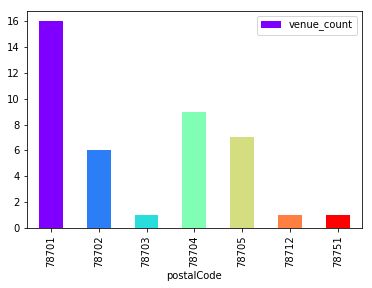

In [84]:

pc_df.plot.bar(x='postalCode', y='venue_count', color=colors_array)

### *At this point I was unable to find any other data to support my recommendation. There doesn't appear to be any available commercial property pricing data for the area, nor could I get any trending venue data from Foursquare for the Austin area.

You can see the final report here: 